# PREDICTING CUSTOMER CHURN FOR SYRIATEL

Name: Amos Kipngetich Rotich

Student Pace: Part Time

Scheduled Project Review Date/Time: September 1, 2024

Instructor Name: Winnie Anyoso


## 1. Introduction

### Background:

Customer churn/turnover is a significant concern for telecommunications companies like SyriaTel. Churn occurs when customers discontinue their service, leading to revenue loss and increased costs for acquiring new customers. Understanding and predicting churn enables companies like SyriaTel to take proactive measures to retain customers at risk of leaving, thereby improving customer satisfaction and reducing financial losses.

### Objective:

The primary objective of this project is to develop a predictive model that identifies SyriaTel customers likely to end their relationship with the company. By accurately predicting the turnover, SyriaTel can focus its retention efforts on at-risk customers, ultimately reducing churn rates and enhancing the company's profitability.

### Dataset Overview:

The dataset used in this project contains records of 3,333 SyriaTel customers. The dataset includes various attributes related to customer demographics, account details, service usage, and customer service interactions. The target variable is churn, a binary indicator of whether a customer has stopped using SyriaTel’s services.

### Business Problem:

For SyriaTel, retaining customers is crucial to maintaining a stable revenue stream. By analyzing data on customer behavior and service usage, the company can identify patterns that suggest a higher likelihood of turnover. The predictive model developed in this project will assist SyriaTel in implementing targeted retention strategies, such as personalized offers or improved customer support, to reduce churn.

## 2. Data Processing

We start by handling any necessary preprocessing steps, including converting categorical variables, handling missing values (if any), and scaling numerical features.

Let's start with the preprocessing:


### A.  Data Understanding

#### 1. Import Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

#### 2. Import Dataset

In [2]:
data = 'bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(data)

#### 3. Data Overview

In [3]:
df.shape

(3333, 21)

##### Comments
The dataset consists of 3,333 customer records, each containing 21 attributes.

In [4]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

##### Comments
The dataset includes features such as:

1. State: The U.S. state in which the customer resides.
2. Account length: The duration of the customer's account.
3. Area code: The area code of the customer's phone number.
4. Phone number: The customer's phone number.
5. International plan: Whether the customer has an international calling plan.
6. Voice mail plan: Whether the customer has a voice mail plan.
7. Churn: A binary column indicating if the customer has churned (True) or not (False).

### B. Data Preprocessing
#### 1. Converting Categorical Variables:
We'll convert categorical variables such as state, international plan, and voice mail plan into numerical values using one-hot encoding.

#### 2. Scaling Numerical Features:
For models sensitive to feature scales, such as logistic regression, we will standardize the numerical features.

In [6]:
# Separate features and target variable
X = df.drop(columns=['churn', 'phone number'])
y = df['churn']

# Define the preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['account length', 'number vmail messages', 
                                   'total day minutes', 'total day calls', 'total day charge',
                                   'total eve minutes', 'total eve calls', 'total eve charge',
                                   'total night minutes', 'total night calls', 'total night charge',
                                   'total intl minutes', 'total intl calls', 'total intl charge',
                                   'customer service calls']),
        ('cat', OneHotEncoder(), ['state', 'area code', 'international plan', 'voice mail plan'])
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### C. Exploratory Data Analysis

We will visualize the dataset to understand the relationships between features and the target variable (churn). This step helps in feature selection and in gaining insights that might influence business recommendations.

#### Key Analyses:
i. Distribution of numerical features like total day minutes, customer service calls, etc.

ii. Churn rates across different states and plans.

iii. Correlation matrix to identify highly correlated features.

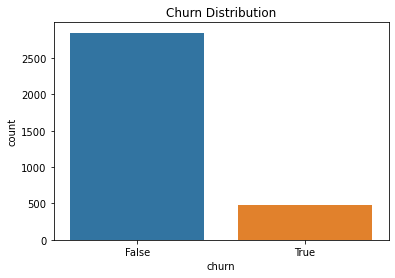

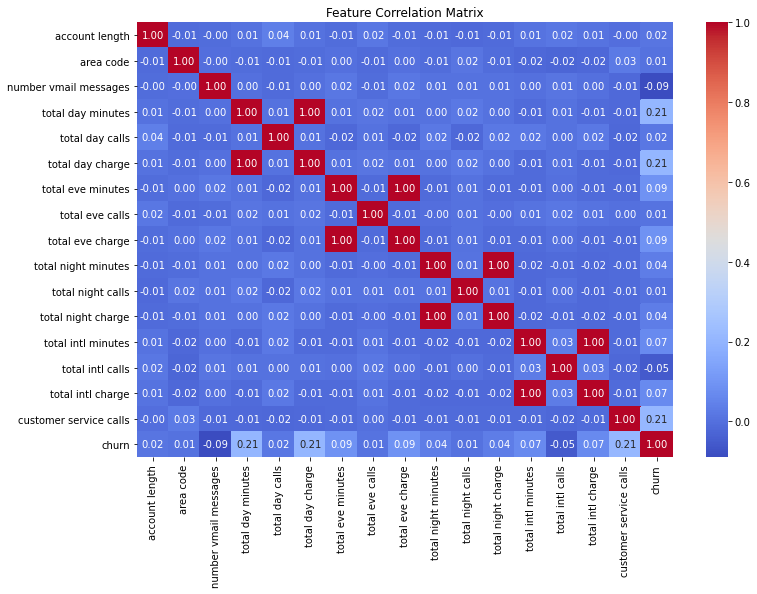

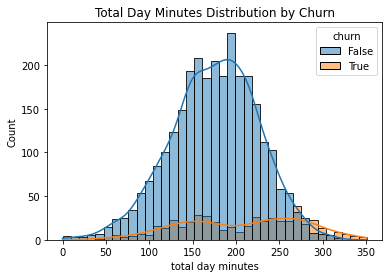

In [7]:
# Visualize churn rate
sns.countplot(x='churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

# Distribution of a key feature
sns.histplot(data=df, x='total day minutes', kde=True, hue='churn')
plt.title('Total Day Minutes Distribution by Churn')
plt.show()

### Interpreting the Plots

##### Churn Distribution Bar Plot

Majority of SyriaTel customers did not churn, as indicated by the tall blue bars(False) while only a small proportion of its customers churned, represented by the short orange bars(True).

This indicates an imbalanced dataset which could greatly impact model performance.

##### Correlation Heatmap

Most of the elements show weak correlations (close to 0). This indicates that most features are not strongly correlated with each other.

The weak correlation indicates that each feature contributes independently to predicting SyriaTel's customer turnover. This therefore favours Decision Tree Model which handles uncorrelated features very well.

##### Distribution Plot of 'Total Day Minutes' by Churn

The distribution of non-churned customers is fairly normal, dorminates the plot and peaks around the middle while churned customers' distribution is spread out with a lower peak. 

The plot suggests that higher usage might be associated with an increased likelihood of churn.

## 3. Model Building and Selection

We will train Logistic Regression and Decision Tree models and compare their performance to identify the best model for this task.

### Comparing Logistic Regression and Decision Tree models

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_val_score

In [9]:
# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Train the models
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)

# Predict using Logistic Regression
logistic_pred = logistic_model.predict(X_test)
logistic_prob = logistic_model.predict_proba(X_test)[:, 1]

# Predict using Decision Tree
decision_tree_pred = decision_tree_model.predict(X_test)
decision_tree_prob = decision_tree_model.predict_proba(X_test)[:, 1]

# Evaluate Logistic Regression
logistic_report = classification_report(y_test, logistic_pred)
logistic_auc = roc_auc_score(y_test, logistic_prob)

# Evaluate Decision Tree
decision_tree_report = classification_report(y_test, decision_tree_pred)
decision_tree_auc = roc_auc_score(y_test, decision_tree_prob)

print("Logistic Regression Report:")
print(logistic_report)
print(f"Logistic Regression AUC-ROC Score: {logistic_auc}\n")

print("Decision Tree Report:")
print(decision_tree_report)
print(f"Decision Tree AUC-ROC Score: {decision_tree_auc}\n")

Logistic Regression Report:
              precision    recall  f1-score   support

       False       0.87      0.97      0.92       566
        True       0.55      0.18      0.27       101

    accuracy                           0.85       667
   macro avg       0.71      0.58      0.59       667
weighted avg       0.82      0.85      0.82       667

Logistic Regression AUC-ROC Score: 0.8255956337683239

Decision Tree Report:
              precision    recall  f1-score   support

       False       0.95      0.96      0.96       566
        True       0.77      0.74      0.76       101

    accuracy                           0.93       667
   macro avg       0.86      0.85      0.86       667
weighted avg       0.93      0.93      0.93       667

Decision Tree AUC-ROC Score: 0.8518524997376062



##### Comments
The Logistic Regression Model seems to be struggling with the minority class which is the churned customers.

Precision - 0.55

Recall    - 0.18

f1score   - 0.27

The recall of 0.18 indicates that our model misses a significant number of actual churn cases. This is because the model is biased towards the majority class.

The Decision Tree Model performs better than the Logistic Regression Model.

Precision - 0.77

Recall    - 0.74

f1score   - 0.76

The recall of 0.74 indicates that the model can identifying churned customers, which suggests that it handles the class imbalance better than Logistic Regression. 

We therefore pick to build on the Decision Tree Model 

### Decision Tree Model Tuning

Fine-tune the Decision Tree Model using cross-validation and hyperparameter tuning.

#### Cross Validation

In [10]:
# Instantiate the model
dt = DecisionTreeRegressor(random_state=42)

# Fit the model to the training data here
dt.fit(X_train, y_train)

# Testing out the model's r2 score on the training data overall
dt_train_score = dt.score(X_train, y_train)
dt_train_score

1.0

In [11]:
# Assign the cross validated score to dt_cv

dt_cv = cross_val_score(dt, X_train, y_train, cv=5)

dt_cv

array([0.34849673, 0.10284216, 0.325237  , 0.12936391, 0.45926331])

#### Hyperparameter Tuning

- Random_state = 42
- Max_depth = 10

In [12]:
# Creating a second decision tree model
dt_tuned = DecisionTreeRegressor(random_state=42, max_depth=10)

# Fit the new model on the training data
dt_tuned.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)

In [13]:
# Testing out the model's r2 score on the training data overall
dt_tuned_train_score = dt_tuned.score(X_train, y_train)
dt_tuned_train_score

0.8773588960811947

In [14]:
# Checking the Cross-validated coefficient of determination (r2 score) of the predictions of `dt_tuned` on the training data
dt_tuned_cv = cross_val_score(dt_tuned, X_train, y_train, cv=5)

dt_tuned_cv

array([0.50972452, 0.34176153, 0.41964667, 0.30969884, 0.55667129])

##### Comments
The r2 scores obtained varies from 0.31 to 0.56. While this is an improvement from our pre-tuned model (range from 0.1 to 0.46), the variation across folds suggests that the model might be overfitting to certain subsets of the data or that there are still opportunities to improve its generalizability.

We will address this issue using SMOTE (Synthetic Minority Over-sampling Technique) which is a popular method used to handle class imbalance by generating synthetic examples for the minority class

### Handling Class Imbalance Using SMOTE

In [16]:
from imblearn.over_sampling import SMOTE

# Define the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [17]:
# Define model
model = DecisionTreeClassifier(random_state=42)

# Fit the pipeline on the SMOTE-applied training data
model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(random_state=42)

#### Evaluate the model

In [18]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.92      0.94       566
        True       0.64      0.77      0.70       101

    accuracy                           0.90       667
   macro avg       0.80      0.85      0.82       667
weighted avg       0.91      0.90      0.90       667



In [19]:
smote_cv = cross_val_score(model, X_train_smote, y_train_smote, cv=5)
smote_cv

array([0.87636761, 0.94967177, 0.93873085, 0.93866375, 0.96276013])

##### Comments
By handling the imbalance using SMOTE, our model's r2 scores are much better.

## 4. Analysis and Visualization

### - Analysis of feature importance

Analyze feature importance to understand which features contribute most to the model’s decisions.

In [20]:
# Get feature importance
feature_importance = model.feature_importances_

# Get the feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

In [21]:
# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print(importance_df)


                        Feature  Importance
2        num__total day minutes    0.254640
14  num__customer service calls    0.154558
70  cat__international plan_yes    0.123411
13       num__total intl charge    0.053840
71      cat__voice mail plan_no    0.048821
..                          ...         ...
56                cat__state_SD    0.000000
27                cat__state_IA    0.000000
37                cat__state_MI    0.000000
51                cat__state_OK    0.000000
45                cat__state_NH    0.000000

[73 rows x 2 columns]


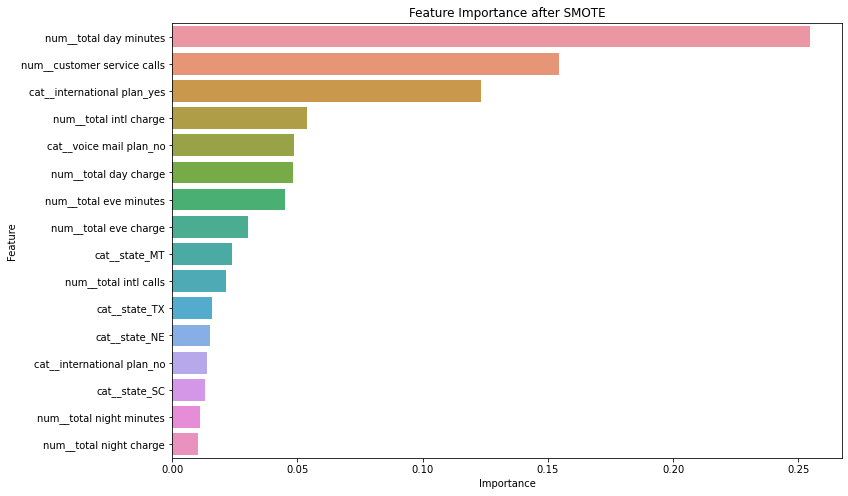

In [22]:
# Filter out features with zero importance
importance_df_filtered = importance_df[importance_df['Importance'] > 0.01]

# Visualize the feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_filtered)
plt.title('Feature Importance after SMOTE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

##### Comments
Here are interpretations for each of the top 5-ranked most important features:

- Total Day Minutes: The amount of time customers spend on calls during the day is a significant predictor of churn, suggesting that higher usage is associated with lower likelihood of leaving.

- Customer Service Calls: The frequency of customer service calls is an important factor; customers who make more calls may indicate dissatisfaction or issues that could lead to higher churn rates.

- International Plan: Having an international plan positively influences customer retention, indicating that customers with this plan are less likely to churn, possibly due to the value they perceive from international calling options.

- Total International Charge: The total charges for international calls serve as a predictor of churn; customers with higher international charges may be more likely to churn, possibly due to cost concerns or dissatisfaction with service.

- Voice Mail Plan: Customers without a voice mail plan tend to show higher churn rates, suggesting that having this feature may enhance customer satisfaction and retention.

### - Customer Churn Prediction

We will use our model to predict customers who are likely to churn.

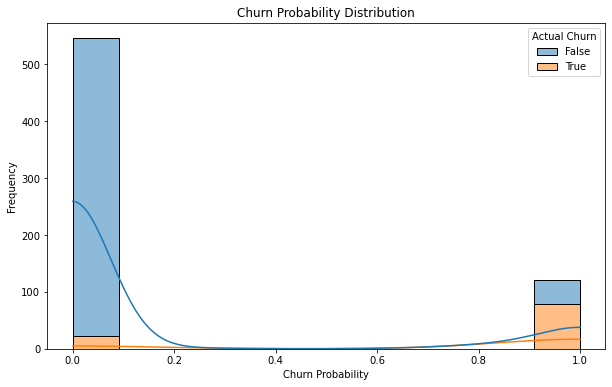

In [23]:
# Predict churn probabilities
y_proba = model.predict_proba(X_test)[:, 1]

# Predict churn classes
y_pred = model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual Churn': y_test,
    'Predicted Churn': y_pred,
    'Churn Probability': y_proba
})

# Ensure that 'Churn Probability' is numeric and 'Actual Churn' is categorical
results_df['Churn Probability'] = results_df['Churn Probability'].astype(float)
results_df['Actual Churn'] = results_df['Actual Churn'].astype(str) 

# Visualize the probability distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=results_df, x='Churn Probability', kde=True, hue='Actual Churn', multiple='stack')
plt.title('Churn Probability Distribution')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

In [24]:
# Drop the target variable and any identifier columns
X_predict = df.drop(columns=['churn', 'phone number'])

# Step 2: Preprocess the Data
X_predict_preprocessed = preprocessor.transform(X_predict)

# Step 3: Use the trained pipeline to make predictions
predictions = model.predict(X_predict_preprocessed)

# Add predictions to the original DataFrame
df['Churn Prediction'] = predictions

# Filter to get rows where Churn Prediction is True
true_churn_predictions = df[df['Churn Prediction'] == True]

# Display the DataFrame with only True churn predictions
print(true_churn_predictions[['phone number', 'Churn Prediction']])

     phone number  Churn Prediction
10       329-6603              True
14       366-9238              True
15       351-7269              True
21       393-7984              True
33       360-1596              True
...           ...               ...
3301     417-1488              True
3304     330-7137              True
3320     411-5677              True
3322     409-1856              True
3323     362-5899              True

[503 rows x 2 columns]


##### Comments
Our model has predicted 503 customers who are likely to churn. This enables the SyriaTel to make data-driven decisions, proactively address potential issues, optimize resource allocation, and ultimately improve customer retention and profitability.

### - Decision Tree Visualization

This is a visual representation of how decisions were made in our model.

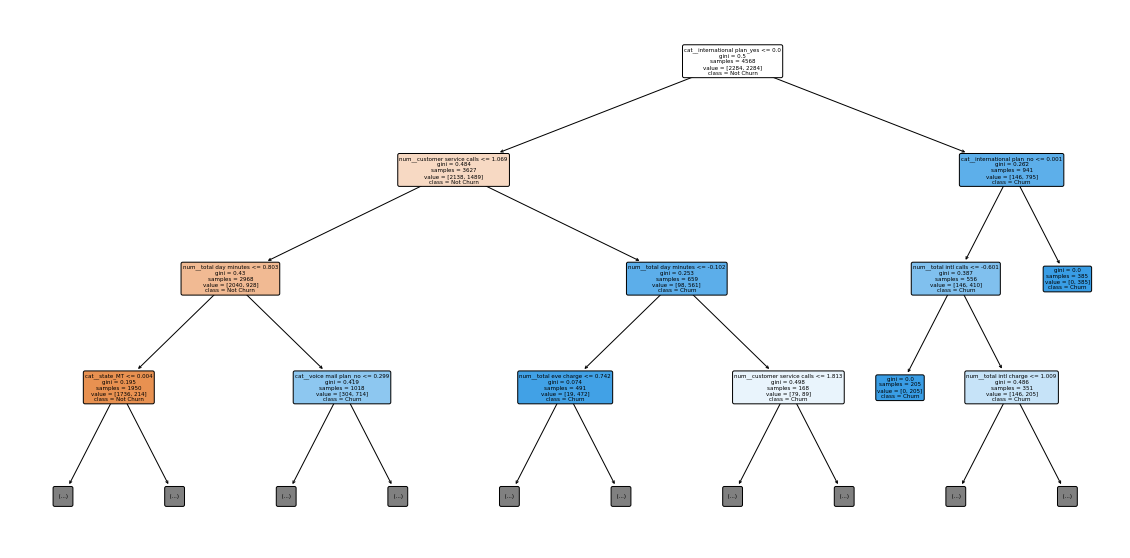

In [25]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names = preprocessor.get_feature_names_out(), class_names=['Not Churn', 'Churn'], filled=True, rounded=True, max_depth=3)
plt.show()

## 5. Business Implications and Recommendations

Our model has given us actionable business insights that SyriaTel can use to address customer churn issue.

### 1. Customer Retention

We identified the most important features driving churn. Our top 5 of these features included:

- Total Day Minutes: The amount of time customers spend on calls during the day is a significant predictor of churn, suggesting that higher usage is associated with lower likelihood of leaving.

- Customer Service Calls: The frequency of customer service calls is an important factor; customers who make more calls may indicate dissatisfaction or issues that could lead to higher churn rates.

- International Plan: Having an international plan positively influences customer retention, indicating that customers with this plan are less likely to churn, possibly due to the value they perceive from international calling options.

- Total International Charge: The total charges for international calls serve as a predictor of churn; customers with higher international charges may be more likely to churn, possibly due to cost concerns or dissatisfaction with service.

- Voice Mail Plan: Customers without a voice mail plan tend to show higher churn rates, suggesting that having this feature may enhance customer satisfaction and retention.

SyriaTel need to implement targeted retention strategies, such as reducing charges for day calls to increase total day minutes spent by customers,improved customer service, introducing international and voicemail plans, and reducing international charges which can reduce churn rates.

### 2. Resource Allocation

Effectively allocating resources based on factors affecting churn involves understanding the specific issues driving customer turnover and implementing targeted strategies to address them.

Syriatel therefore need to allocate their resources to areas such as customer service, pricing, introducing favourable plans, and personalized engagement, which can enhance customer satisfaction, reduce churn, and ultimately drive business growth.

### 3. Predictive Monitoring

We identified 503 customers who are likely to stop using SyriaTel services. Identifying potential churners allows Syriatel to implement targeted retention strategies, such as personalized offers or improved customer service, which can reduce churn rates.

Retaining customers is often less costly than acquiring new ones. By predicting churn, the Syriatel can focus its efforts and resources on high-risk customers, optimizing marketing and customer support efforts thus safeguard its revenue streams and improve profitability.